# Import packages and/or modules

In [10]:
import sys, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import requests
import pygam
import statsmodels.api as sm
from statsmodels.tsa import seasonal

# API key for NSRDB
NSRDB_api_key = open("NSRDB_api_key").readlines()[0]

# seaborn plot theme
sns.set(palette = "colorblind", font_scale = 1.5)
sns.set_context("poster")

# column display
pd.set_option("display.max_columns", 200)

# Boulder, CO ozone data
Example: [https://aqs.epa.gov/data/api/qaOnePointQcRawData/byCounty?email=test@aqs.api&key=test&param=44201&bdate=20180101&edate=20180131&state=25&county=001](https://aqs.epa.gov/data/api/qaOnePointQcRawData/byCounty?email=test@aqs.api&key=test&param=44201&bdate=20180101&edate=20180131&state=25&county=001)

## Request Ozone

In [50]:
# data frame container
o3_boulder = pd.DataFrame()

for start_date, end_date in zip([str(x) + "0101" for x in np.arange(2015, 2023)], [str(x) + "1231" for x in np.arange(2015, 2023)]):
    # url
    url_i = "https://aqs.epa.gov/data/api/sampleData/byCounty?email={email}&key={api_key}&param={param}&bdate={start_date}&edate={end_date}&state={state}&county={county}".format(**{"email": "michalak.nicholas@gmail.com", "api_key": NSRDB_api_key, "param": "44201", "start_date": start_date, "end_date": end_date, "state": "08", "county": "013"})
    
    # data
    data_i = pd.DataFrame((requests.get(url_i).json()["Data"]))
    
    # data frame
    o3_boulder = pd.concat([o3_boulder, data_i])

# sample it
o3_boulder

,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,date_local,time_local,date_gmt,time_gmt,sample_measurement,units_of_measure,units_of_measure_code,sample_duration,sample_duration_code,sample_frequency,detection_limit,uncertainty,qualifier,method_type,method,method_code,state,county,date_of_last_change,cbsa_code
0,08,013,0011,44201,1,39.957212,-105.238458,WGS84,Ozone,2015-01-01,00:00,2015-01-01,07:00,0.039,Parts per million,007,1 HOUR,1,HOURLY,0.005,None,None,FEM,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,087,Colorado,Boulder,2015-03-13,14500
1,08,013,0011,44201,1,39.957212,-105.238458,WGS84,Ozone,2015-01-01,01:00,2015-01-01,08:00,0.040,Parts per million,007,1 HOUR,1,HOURLY,0.005,None,None,FEM,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,087,Colorado,Boulder,2015-03-13,14500
2,08,013,0011,44201,1,39.957212,-105.238458,WGS84,Ozone,2015-01-01,02:00,2015-01-01,09:00,0.038,Parts per million,007,1 HOUR,1,HOURLY,0.005,None,None,FEM,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,087,Colorado,Boulder,2015-03-13,14500
3,08,013,0011,44201,1,39.957212,-105.238458,WGS84,Ozone,2015-01-01,03:00,2015-01-01,10:00,0.037,Parts per million,007,1 HOUR,1,HOURLY,0.005,None,None,FEM,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,087,Colorado,Boulder,2015-03-13,14500
4,08,013,0011,44201,1,39.957212,-105.238458,WGS84,Ozone,2015-01-01,04:00,2015-01-01,11:00,0.038,Parts per million,007,1 HOUR,1,HOURLY,0.005,None,None,FEM,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,087,Colorado,Boulder,2015-03-13,14500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,08,013,0014,44201,1,40.070016,-105.220238,NAD83,Ozone,2022-06-30,19:00,2022-07-01,02:00,0.045,Parts per million,007,1 HOUR,1,HOURLY,0.005,None,None,FEM,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,087,Colorado,Boulder,2022-07-18,14500
4340,08,013,0014,44201,1,40.070016,-105.220238,NAD83,Ozone,2022-06-30,20:00,2022-07-01,03:00,0.043,Parts per million,007,1 HOUR,1,HOURLY,0.005,None,None,FEM,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,087,Colorado,Boulder,2022-07-18,14500
4341,08,013,0014,44201,1,40.070016,-105.220238,NAD83,Ozone,2022-06-30,21:00,2022-07-01,04:00,0.041,Parts per million,007,1 HOUR,1,HOURLY,0.005,None,None,FEM,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,087,Colorado,Boulder,2022-07-18,14500
4342,08,013,0014,44201,1,40.070016,-105.220238,NAD83,Ozone,2022-06-30,22:00,2022-07-01,05:00,0.039,Parts per million,007,1 HOUR,1,HOURLY,0.005,None,None,FEM,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,087,Colorado,Boulder,2022-07-18,14500


## Data

In [51]:
o3_boulder.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59856 entries, 0 to 4343
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state_code             59856 non-null  object 
 1   county_code            59856 non-null  object 
 2   site_number            59856 non-null  object 
 3   parameter_code         59856 non-null  object 
 4   poc                    59856 non-null  int64  
 5   latitude               59856 non-null  float64
 6   longitude              59856 non-null  float64
 7   datum                  59856 non-null  object 
 8   parameter              59856 non-null  object 
 9   date_local             59856 non-null  object 
 10  time_local             59856 non-null  object 
 11  date_gmt               59856 non-null  object 
 12  time_gmt               59856 non-null  object 
 13  sample_measurement     57868 non-null  float64
 14  units_of_measure       59856 non-null  object 
 15  uni

## Modifying variables

In [52]:
# date time
o3_boulder["date_time"] = pd.to_datetime(o3_boulder["date_local"] + " " + o3_boulder["time_local"])

# year
o3_boulder["date_year"] = o3_boulder["date_time"].dt.year

# month
o3_boulder["date_month"] = o3_boulder["date_time"].dt.month

# date
o3_boulder["date"] = o3_boulder["date_time"].dt.date

# date
o3_boulder["date_hour"] = o3_boulder["date_time"].dt.hour

# parts per million to parts per billion
o3_boulder["o3_ppb"] = o3_boulder["sample_measurement"] * 1000

# AQI levels
def ppb_to_level(x):
    if x > 0 and x <= 54:
        return "Good"
    elif x > 54 and x <= 70:
        return "Moderate"
    elif x > 70 and x <= 85:
        return "Unhealthy for Sensitive Groups"
    elif x > 85 and x <= 105:
        return "Unhealthy"
    elif x > 105 and x <= 200:
        return "Very unhealthy"
    elif x > 200:
        return "Hazardous"
    else:
        None

o3_boulder["aqi_level"] = o3_boulder["o3_ppb"].apply(lambda x: ppb_to_level(x))

# see it
o3_boulder

,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,date_local,time_local,date_gmt,time_gmt,sample_measurement,units_of_measure,units_of_measure_code,sample_duration,sample_duration_code,sample_frequency,detection_limit,uncertainty,qualifier,method_type,method,method_code,state,county,date_of_last_change,cbsa_code,date_time,date_year,date_month,date,date_hour,o3_ppb,aqi_level
0,08,013,0011,44201,1,39.957212,-105.238458,WGS84,Ozone,2015-01-01,00:00,2015-01-01,07:00,0.039,Parts per million,007,1 HOUR,1,HOURLY,0.005,None,None,FEM,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,087,Colorado,Boulder,2015-03-13,14500,2015-01-01 00:00:00,2015,1,2015-01-01,0,39.0,Good
1,08,013,0011,44201,1,39.957212,-105.238458,WGS84,Ozone,2015-01-01,01:00,2015-01-01,08:00,0.040,Parts per million,007,1 HOUR,1,HOURLY,0.005,None,None,FEM,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,087,Colorado,Boulder,2015-03-13,14500,2015-01-01 01:00:00,2015,1,2015-01-01,1,40.0,Good
2,08,013,0011,44201,1,39.957212,-105.238458,WGS84,Ozone,2015-01-01,02:00,2015-01-01,09:00,0.038,Parts per million,007,1 HOUR,1,HOURLY,0.005,None,None,FEM,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,087,Colorado,Boulder,2015-03-13,14500,2015-01-01 02:00:00,2015,1,2015-01-01,2,38.0,Good
3,08,013,0011,44201,1,39.957212,-105.238458,WGS84,Ozone,2015-01-01,03:00,2015-01-01,10:00,0.037,Parts per million,007,1 HOUR,1,HOURLY,0.005,None,None,FEM,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,087,Colorado,Boulder,2015-03-13,14500,2015-01-01 03:00:00,2015,1,2015-01-01,3,37.0,Good
4,08,013,0011,44201,1,39.957212,-105.238458,WGS84,Ozone,2015-01-01,04:00,2015-01-01,11:00,0.038,Parts per million,007,1 HOUR,1,HOURLY,0.005,None,None,FEM,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,087,Colorado,Boulder,2015-03-13,14500,2015-01-01 04:00:00,2015,1,2015-01-01,4,38.0,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,08,013,0014,44201,1,40.070016,-105.220238,NAD83,Ozone,2022-06-30,19:00,2022-07-01,02:00,0.045,Parts per million,007,1 HOUR,1,HOURLY,0.005,None,None,FEM,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,087,Colorado,Boulder,2022-07-18,14500,2022-06-30 19:00:00,2022,6,2022-06-30,19,45.0,Good
4340,08,013,0014,44201,1,40.070016,-105.220238,NAD83,Ozone,2022-06-30,20:00,2022-07-01,03:00,0.043,Parts per million,007,1 HOUR,1,HOURLY,0.005,None,None,FEM,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,087,Colorado,Boulder,2022-07-18,14500,2022-06-30 20:00:00,2022,6,2022-06-30,20,43.0,Good
4341,08,013,0014,44201,1,40.070016,-105.220238,NAD83,Ozone,2022-06-30,21:00,2022-07-01,04:00,0.041,Parts per million,007,1 HOUR,1,HOURLY,0.005,None,None,FEM,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,087,Colorado,Boulder,2022-07-18,14500,2022-06-30 21:00:00,2022,6,2022-06-30,21,41.0,Good
4342,08,013,0014,44201,1,40.070016,-105.220238,NAD83,Ozone,2022-06-30,22:00,2022-07-01,05:00,0.039,Parts per million,007,1 HOUR,1,HOURLY,0.005,None,None,FEM,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,087,Colorado,Boulder,2022-07-18,14500,2022-06-30 22:00:00,2022,6,2022-06-30,22,39.0,Good


# Plots

''

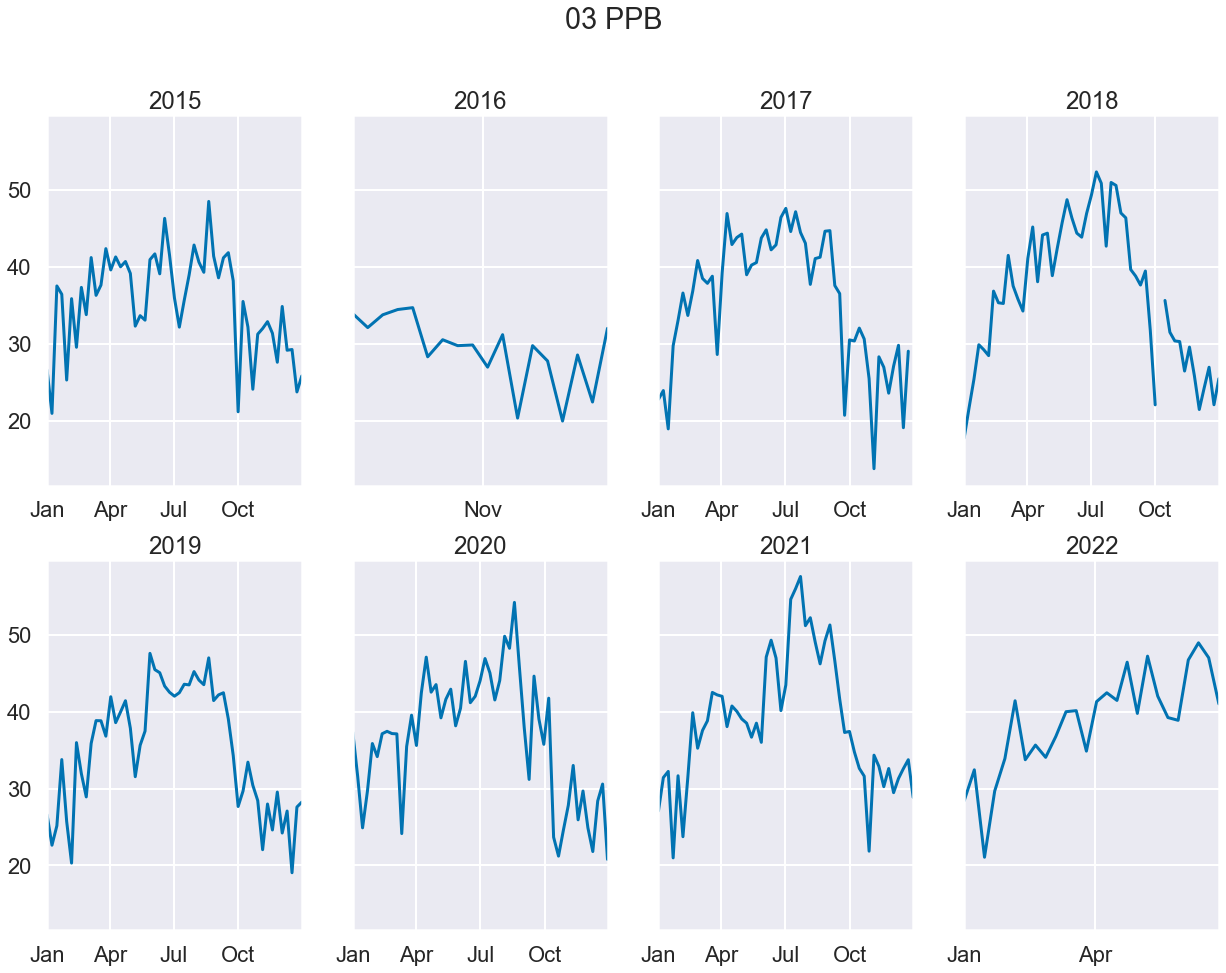

In [74]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (10.5 * 2, 7.5 * 2), sharex = False, sharey = True)
axes = axes.flatten()

for i, year_i in enumerate([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]):
    o3_boulder.set_index("date_time").query(f"date_year == {year_i}")["o3_ppb"].resample("7d").mean().plot(ax = axes[i])
    
    axes[i].xaxis.set_major_locator(mdates.MonthLocator(interval = 3))
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter("%b"))

    axes[i].set(xlabel = None, title = year_i)

fig.suptitle("03 PPB")

# o3_boulder.set_index("date_time")["o3_ppb"].resample("1m").mean().plot(ax = axes, label = "monthly average", color = "black")

# axes.legend(loc = "best")
;